In [28]:
from langgraph.graph import START,END,StateGraph
from langgraph.checkpoint.memory import InMemorySaver
from typing import Dict,TypedDict,List

In [29]:
class GraphStates(TypedDict,total=False):
    research_topic:str
    topic_contexts:List[str]


In [30]:
Graph=StateGraph(GraphStates)

In [31]:
memory=InMemorySaver()
config={"configurable":{"thread_id":"1"}}

In [21]:
def first_node(States:GraphStates)->Dict:
    current_context=States.get("topic_contexts")
    current_context.append("The research has been started")
    return {"research_topic":States.get("research_topic"),"topic_contexts":current_context}

In [22]:
# Nodes
Graph.add_node("first",first_node)

# Edges

Graph.add_edge(START,"first")
Graph.add_edge("first",END)

In [23]:
app=Graph.compile(checkpointer=memory)

In [24]:
graph=app.get_graph()

mermaid=graph.draw_mermaid()

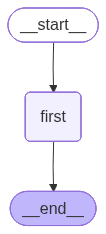

In [27]:
from IPython.display import Image,display
display(Image(graph.draw_mermaid_png()))

In [25]:
print(mermaid)

---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	first(first)
	__end__([<p>__end__</p>]):::last
	__start__ --> first;
	first --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc

